In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita')

In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import models, layers


# Prepocessing

In [ ]:
#bawal putih
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Bawal Putih ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#belato
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Belato')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cakalang
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Cakalang')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gembolo
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Gembolo')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#gole-gole
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Gole Gole')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kakap merah
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kakap Merah ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kembung
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kembung ')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#kerapu
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Kerapu')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tenggiri
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Tenggiri')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#tuna
import os
folder_path = ('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita/Ikan Tuna')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/BANGKIT 2023/Data Mentah/Data Mentah Mita')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath              Label
0  /content/drive/MyDrive/BANGKIT 2023/Data Menta...       Ikan Gembolo
1  /content/drive/MyDrive/BANGKIT 2023/Data Menta...        Ikan Kerapu
2  /content/drive/MyDrive/BANGKIT 2023/Data Menta...  Ikan Bawal Putih

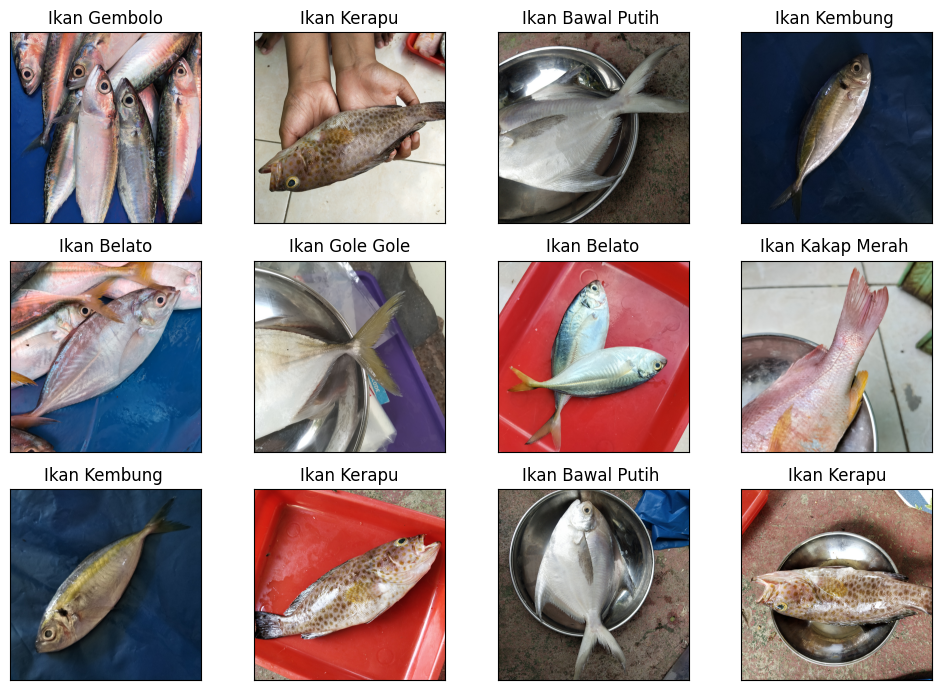

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

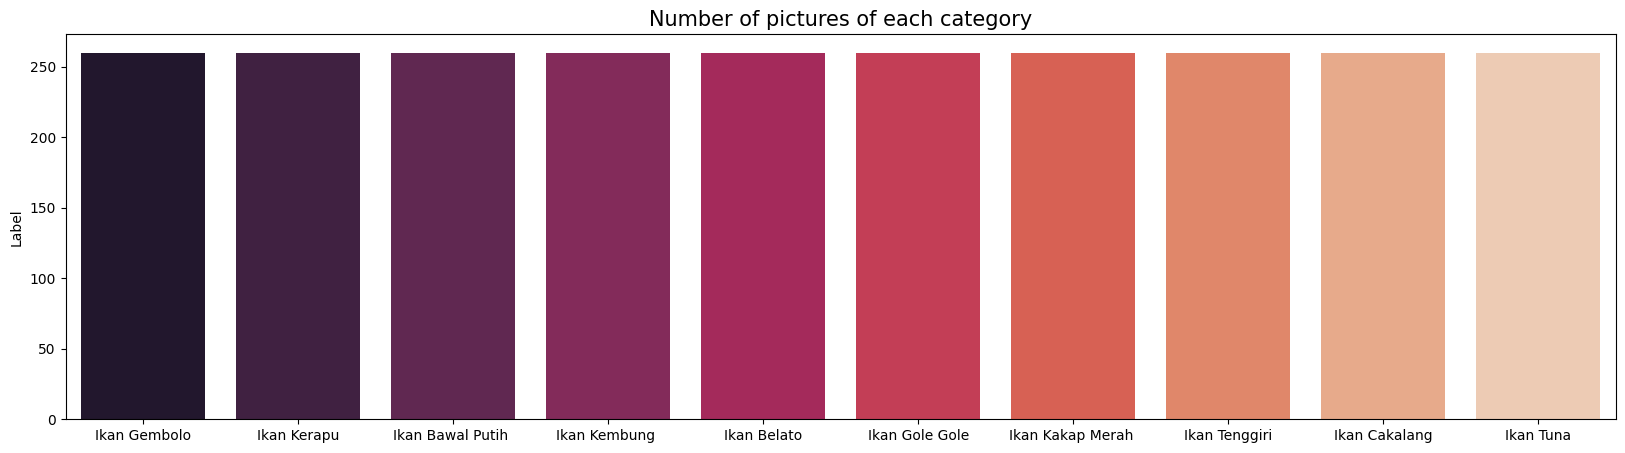

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         class_mode = 'categorical',
                                         )

Found 2080 validated image filenames belonging to 10 classes.
Found 520 validated image filenames belonging to 10 classes.


# Model Parameter

In [ ]:
batch_size = 16
EPOCHS = 100
WARMUP_EPOCHS = 2
LEARNING_RATE = 0.001
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 416
WIDTH = 416
CANAL = 3
N_CLASSES = 10
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5

In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

# Modelling & Training ResNet-50




In [ ]:
input_shape = (224,224,3)
model_input = Input(shape=input_shape)

In [ ]:
#  initializing model with weights='imagenet'i.e. we are carring its original weights
import tensorflow as tf
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=input_shape,input_tensor=model_input)


In [ ]:
ResNet_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 422, 422, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 208, 208, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [ ]:
resnet = Sequential()
resnet.add(ResNet_model)
# resnet.add(layers.Dropout(0.3))
resnet.add(layers.Flatten())
resnet.add(layers.Dropout(0.5))
resnet.add(layers.Dense(128, activation='relu'))
resnet.add(layers.Dense(4, activation='softmax'))

for layer in resnet.layers[:-1]:
    layer.trainable=False
# resnet.layers[0].trainable = False

resnet.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])


# adam = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# resnet.compile(loss='categorical_crossentropy',
#                   optimizer=adam,
#                   metrics=['accuracy'])
resnet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 13, 13, 2048)      58331648  
                                                                 
 flatten (Flatten)           (None, 346112)            0         
                                                                 
 dropout (Dropout)           (None, 346112)            0         
                                                                 
 dense (Dense)               (None, 128)               44302464  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 102,634,628
Trainable params: 516
Non-trainable params: 102,634,112
_________________________________________________________________


In [ ]:
resnet_history = resnet.fit(train_data,
                            validation_data=val_data,
                            steps_per_epoch=train_data.n/16,
                            validation_steps=test_data.n/16,
                            epochs=20,
                            )

Epoch 1/20
383/383 [==============================] - 188s 434ms/step - loss: 2.6304 - accuracy: 0.2469 - val_loss: 1.9499 - val_accuracy: 0.2568
Epoch 2/20
383/383 [==============================] - 177s 461ms/step - loss: 2.3857 - accuracy: 0.2621 - val_loss: 1.8569 - val_accuracy: 0.2682
Epoch 3/20
383/383 [==============================] - 178s 464ms/step - loss: 2.2799 - accuracy: 0.2661 - val_loss: 1.7762 - val_accuracy: 0.2852
Epoch 4/20
383/383 [==============================] - 178s 464ms/step - loss: 2.1843 - accuracy: 0.2736 - val_loss: 1.7085 - val_accuracy: 0.2966
Epoch 5/20
383/383 [==============================] - 178s 464ms/step - loss: 2.0727 - accuracy: 0.2857 - val_loss: 1.6450 - val_accuracy: 0.3068
Epoch 6/20
383/383 [==============================] - 178s 464ms/step - loss: 2.0138 - accuracy: 0.2926 - val_loss: 1.5835 - val_accuracy: 0.3193
Epoch 7/20
383/383 [==============================] - 178s 464ms/step - loss: 1.8670 - accuracy: 0.3123 - val_loss: 1.5264 -

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

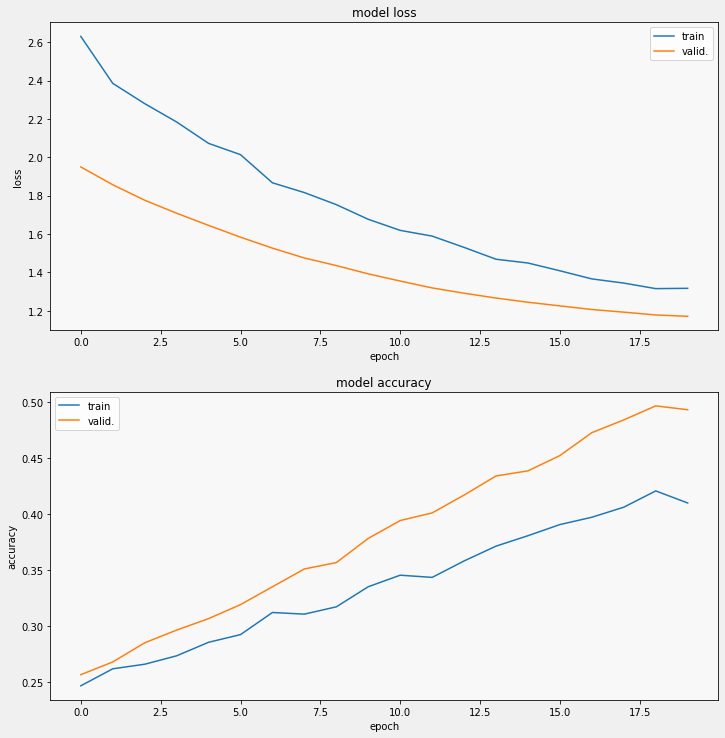

In [ ]:
#display
display_training_curves(
    resnet_history.history['loss'],
    resnet_history.history['val_loss'],
    'loss', 211)
display_training_curves(
    resnet_history.history['accuracy'],
    resnet_history.history['val_accuracy'],
    'accuracy', 212)

# Evaluation dan Prediction

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = resnet.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 4 predictions: {pred[:4]}')

The first 4 predictions: ['penyu tempayan', 'penyu sisik', 'penyu hijau', 'penyu tempayan']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   penyu hijau       0.43      0.48      0.45       224
  penyu lekang       0.62      0.46      0.53       207
   penyu sisik       0.50      0.50      0.50       218
penyu tempayan       0.48      0.54      0.51       218

      accuracy                           0.50       867
     macro avg       0.51      0.50      0.50       867
  weighted avg       0.51      0.50      0.50       867



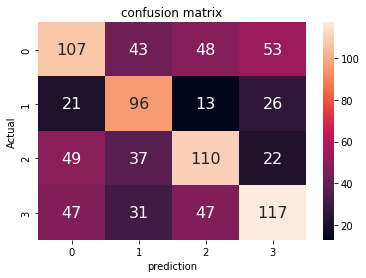

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

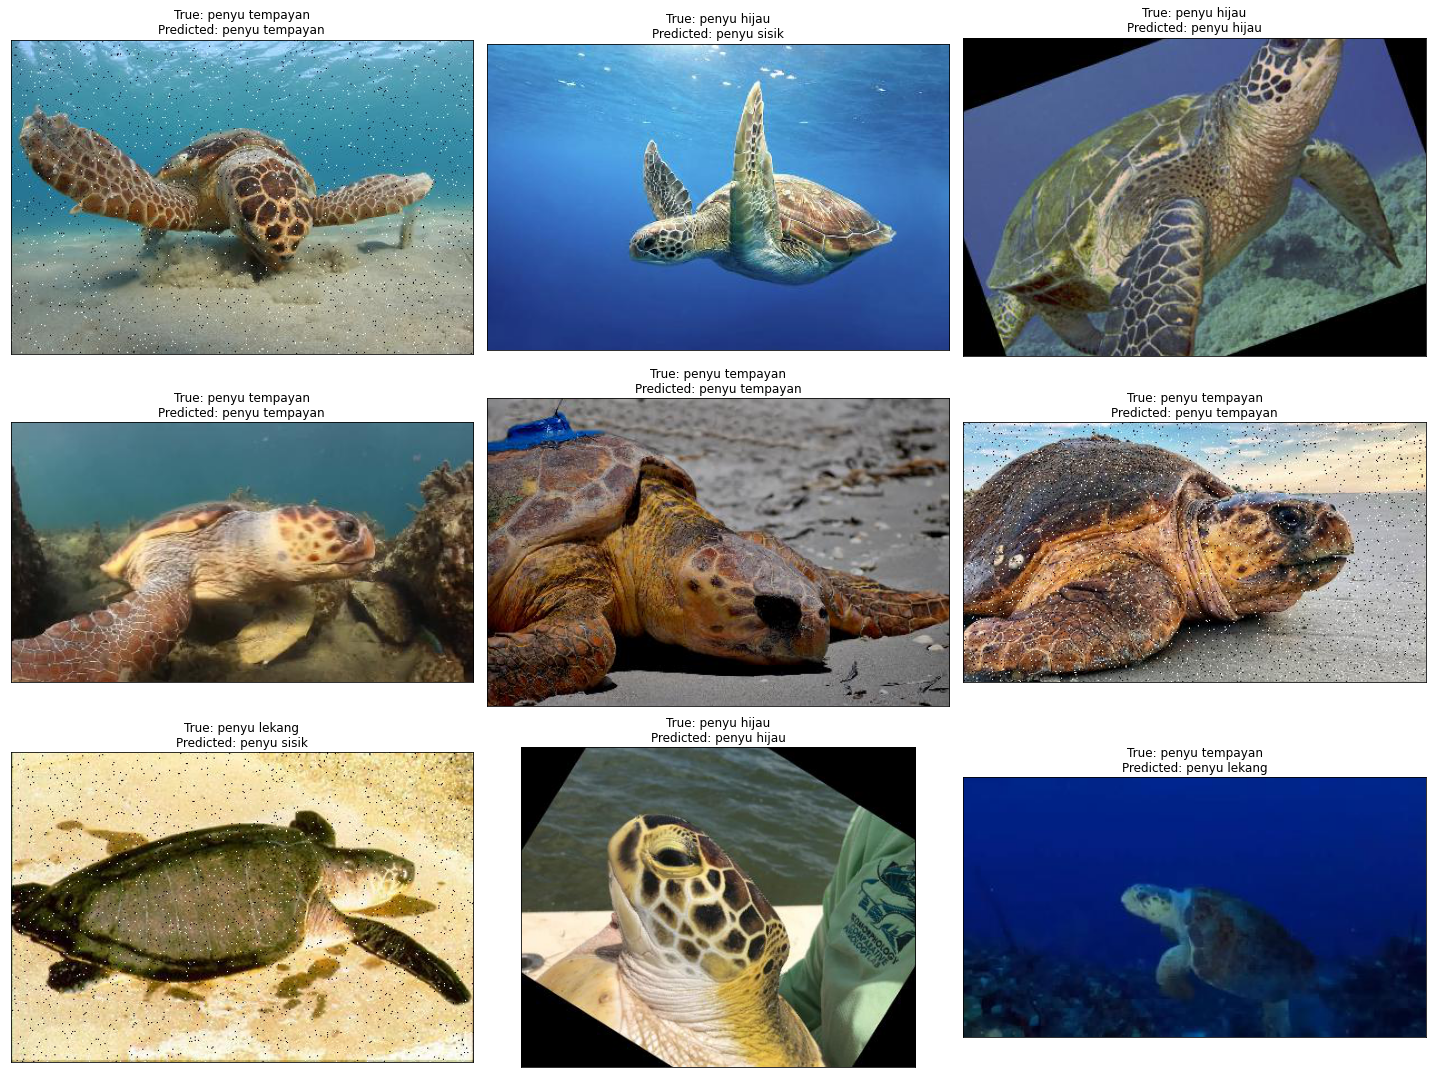

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# Save Model

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/Ensemble Model"
PROJECT_NAME = "Hasil"
SAVE_MODEL_NAME = "model_resnet152.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
resnet.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Ensemble Model/Hasil/model_resnet152.h5...


# Predict new data

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving uji (5).png to uji (5).png
[[0. 0. 0. 1.]]
Penyu Tempayan


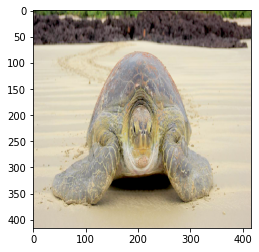

In [ ]:
#Input Gambar
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(416,416))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = resnet.predict(images, batch_size=10)
  print(classes)
  if classes[0][0] == 1:
    print('Penyu Hijau')
  elif classes[0][1] == 1:
    print('Penyu Lekang')
  elif classes[0][2] == 1:
    print('Penyu Sisik')
  elif classes[0][3] == 1:
    print('Penyu Tempayan')